In [33]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from pandas_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier 

In [18]:
titanic = pd.read_csv('titanic.csv')

In [19]:
titanic.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [22]:
ProfileReport(titanic)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
# here we are replacing categorical data with number
titanic = titanic.replace(to_replace=['male','female'], value = [1,0])  

In [48]:
np.mean(titanic['Age'])

29.69911764705882

In [50]:
np.median(titanic['Age'])

nan

In [60]:
titanic = titanic.replace(to_replace=['Nan'], value = [29.69])  

In [76]:
titanic['Age'].fillna(value= 29.69 ,inplace=True)

In [77]:
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [78]:
y = titanic[['Survived']]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=299)

<IPython.core.display.Javascript object>

In [80]:
X_test

Pclass  Sex    Age  SibSp  Parch     Fare
707       1    1  42.00      0      0  26.2875
142       3    0  24.00      1      0  15.8500
507       1    1  29.69      0      0  26.5500
121       3    1  29.69      0      0   8.0500
762       3    1  20.00      0      0   7.2292
..      ...  ...    ...    ...    ...      ...
540       1    0  36.00      0      2  71.0000
235       3    0  29.69      0      0   7.5500
329       1    0  16.00      0      1  57.9792
193       2    1   3.00      1      1  26.0000
759       1    0  33.00      0      0  86.5000

[179 rows x 6 columns]

In [81]:
DecisionTreeClassifier(X_train, y_train)

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass criterion=     Pclass  Sex    Age  SibSp  Parch      Fare
6         1    1  54.00      0      0   51.8625
28        3    0  29.69      0      0    7.8792
348       3    1   3.00      1      1   15.9000
25        3    0  38.00      1      5   31.3875
259       2    0  50.00      0      1   26.0000
..      ...  ...    ...    ...    ...       ...
555       1    1  62.00      0      0   26.5500
404       3    0  20.00      0      0    8.6625
53        2    0  29.00      1      0   26.0000
714       2    1  52.00      0      0   13.0000
730       1    0  29.00      0      0  211.3375

[712 rows x 6 columns], splitter=     Survived
6           0
28          1
348         1
25          1
259         1
..        ...
555         0
404         0
53          1
714         0
730         1

[712 rows x 1 columns] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments wi

DecisionTreeClassifier(criterion=     Pclass  Sex    Age  SibSp  Parch      Fare
6         1    1  54.00      0      0   51.8625
28        3    0  29.69      0      0    7.8792
348       3    1   3.00      1      1   15.9000
25        3    0  38.00      1      5   31.3875
259       2    0  50.00      0      1   26.0000
..      ...  ...    ...    ...    ...       ...
555       1    1  62.00      0      0   26.5500
404       3    0  20.00      0      0    8.6625
53        2    0  29.00      1      0   26.0000
714       2    1  52.00      0      0   13.0000
730       1    0  29.00      0      0  211.3375

[712 rows x 6 columns],
                       splitter=     Survived
6           0
28          1
348         1
25          1
259         1
..        ...
555         0
404         0
53          1
714         0
730         1

[712 rows x 1 columns])

In [82]:
dt_model = DecisionTreeClassifier()

In [83]:
dt_model

DecisionTreeClassifier()

In [84]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
dt_model.predict(X_test)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1], dtype=int64)

In [86]:
dt_model.score(X_test,y_test)

0.7988826815642458

In [87]:
dt_en = DecisionTreeClassifier(criterion='entropy')

In [88]:
dt_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [91]:
dt_en.score(X_test,y_test)

0.7988826815642458

In [97]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

[Text(434.9504312991159, 1066.2923076923078, 'X[1] <= 0.5\ngini = 0.467\nsamples = 712\nvalue = [447, 265]'),
 Text(195.40962671905697, 1024.4769230769232, 'X[0] <= 2.5\ngini = 0.391\nsamples = 244\nvalue = [65, 179]'),
 Text(96.47151277013752, 982.6615384615385, 'X[5] <= 28.856\ngini = 0.115\nsamples = 131\nvalue = [8, 123]'),
 Text(78.9312377210216, 940.8461538461539, 'X[2] <= 56.0\ngini = 0.219\nsamples = 56\nvalue = [7, 49]'),
 Text(70.16110019646365, 899.0307692307692, 'X[5] <= 28.217\ngini = 0.194\nsamples = 55\nvalue = [6, 49]'),
 Text(61.3909626719057, 857.2153846153847, 'X[3] <= 0.5\ngini = 0.168\nsamples = 54\nvalue = [5, 49]'),
 Text(35.080550098231825, 815.4000000000001, 'X[5] <= 13.25\ngini = 0.105\nsamples = 36\nvalue = [2, 34]'),
 Text(26.31041257367387, 773.5846153846154, 'X[5] <= 12.675\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(17.540275049115913, 731.7692307692308, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(35.080550098231825, 731.7692307692308, 'X[

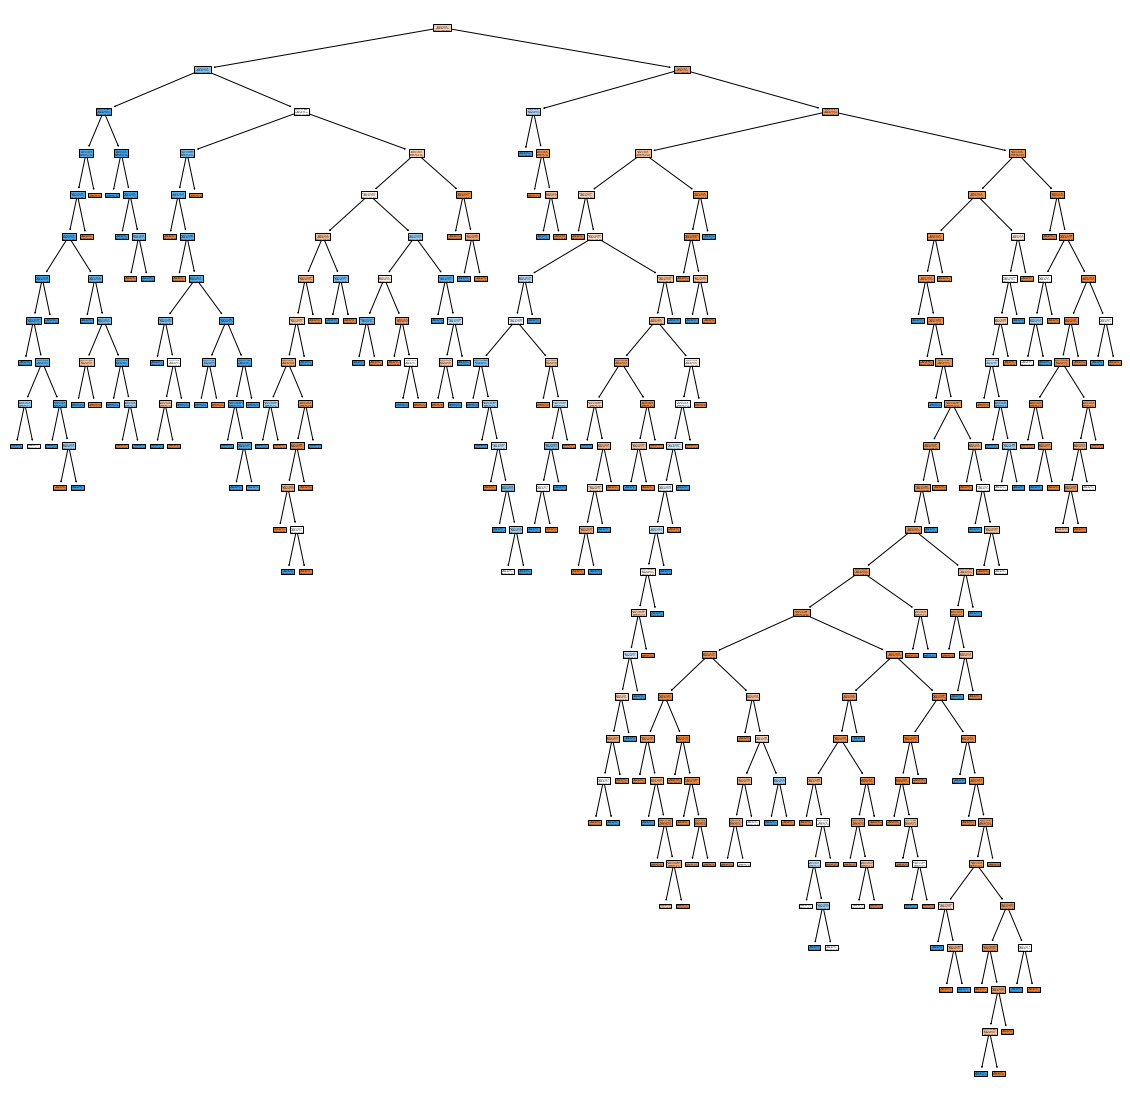

In [99]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model, filled = True)

In [153]:
titanic1 = titanic.head(300)

In [154]:
titanic1

PassengerId  Survived  Pclass  ...      Fare    Cabin  Embarked
0              1         0       3  ...    7.2500      NaN         S
1              2         1       1  ...   71.2833      C85         C
2              3         1       3  ...    7.9250      NaN         S
3              4         1       1  ...   53.1000     C123         S
4              5         0       3  ...    8.0500      NaN         S
..           ...       ...     ...  ...       ...      ...       ...
295          296         0       1  ...   27.7208      NaN         C
296          297         0       3  ...    7.2292      NaN         C
297          298         0       1  ...  151.5500  C22 C26         S
298          299         1       1  ...   30.5000     C106         S
299          300         1       1  ...  247.5208  B58 B60         C

[300 rows x 12 columns]

In [155]:
x1 = titanic1[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [156]:
y1 = titanic1[['Survived']]

In [157]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

[Text(355.359375, 1060.02, 'Sex <= 0.5\ngini = 0.461\nsamples = 300\nvalue = [192, 108]'),
 Text(162.0, 1005.6600000000001, 'Pclass <= 2.5\ngini = 0.412\nsamples = 107\nvalue = [31, 76]'),
 Text(72.0, 951.3000000000001, 'Age <= 2.5\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(54.0, 896.94, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(90.0, 896.94, 'Fare <= 29.392\ngini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(72.0, 842.58, 'Fare <= 28.231\ngini = 0.236\nsamples = 22\nvalue = [3, 19]'),
 Text(54.0, 788.22, 'Age <= 28.0\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(36.0, 733.8600000000001, 'Age <= 22.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(18.0, 679.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(54.0, 679.5, 'Parch <= 1.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(36.0, 625.1400000000001, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(72.0, 625.1400000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(72.0, 733.860000000

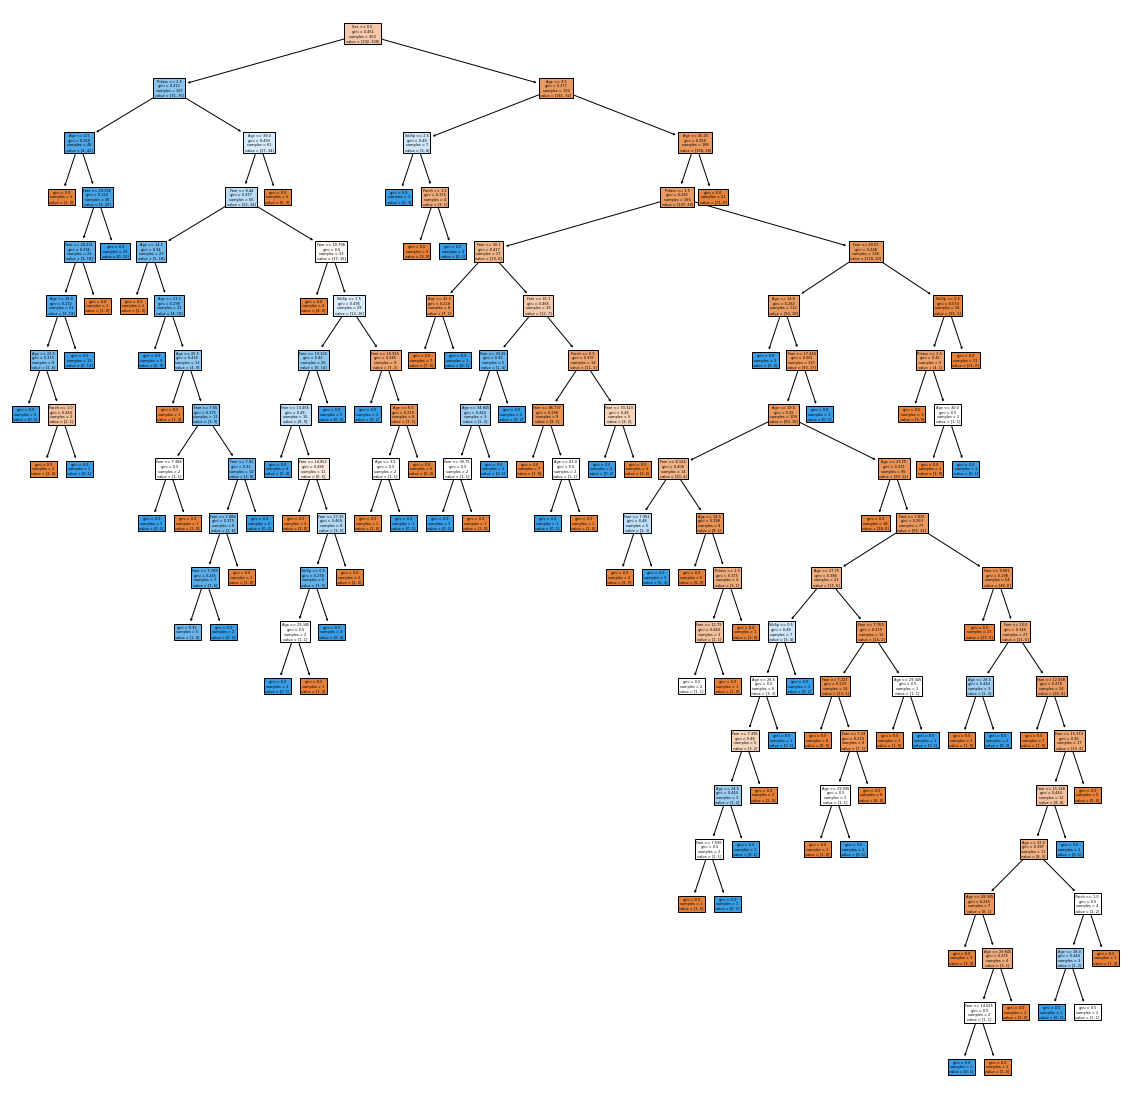

In [158]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1, filled = True, feature_names=x1.columns, )

In [159]:
set(y1)

{'Survived'}

In [160]:
dt_model1.predict(x1)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], d

In [161]:
dt_model1.score(x1,y1)

0.99

In [162]:
dt_model1.score(X_test,y_test)

0.8100558659217877

In [163]:
path = dt_model1.cost_complexity_pruning_path(x1,y1)
ccp_alpha = path['ccp_alphas']

In [164]:
path

{'ccp_alphas': array([0.        , 0.00038095, 0.00083333, 0.00092593, 0.00111111,
        0.00177778, 0.00190476, 0.00206349, 0.00213675, 0.00219336,
        0.00222222, 0.00232143, 0.00232804, 0.00255892, 0.0027381 ,
        0.00277778, 0.00291667, 0.00296296, 0.00340909, 0.00373333,
        0.00409621, 0.00426877, 0.00453704, 0.00489418, 0.00499938,
        0.005     , 0.00504146, 0.00561111, 0.00568116, 0.00642857,
        0.00796712, 0.00819676, 0.01128025, 0.02211558, 0.13604672]),
 'impurities': array([0.012     , 0.01238095, 0.01404762, 0.01497354, 0.01608466,
        0.02141799, 0.02713228, 0.03332275, 0.03973301, 0.04411973,
        0.04856418, 0.05784989, 0.06483402, 0.07251079, 0.07798698,
        0.08354253, 0.08937586, 0.09530179, 0.10211997, 0.12078664,
        0.14536392, 0.14963269, 0.15416973, 0.16395809, 0.18395561,
        0.18895561, 0.22424586, 0.2466903 , 0.25237146, 0.25880003,
        0.26676716, 0.29135745, 0.3026377 , 0.32475328, 0.4608    ])}

In [165]:
ccp_alpha

array([0.        , 0.00038095, 0.00083333, 0.00092593, 0.00111111,
       0.00177778, 0.00190476, 0.00206349, 0.00213675, 0.00219336,
       0.00222222, 0.00232143, 0.00232804, 0.00255892, 0.0027381 ,
       0.00277778, 0.00291667, 0.00296296, 0.00340909, 0.00373333,
       0.00409621, 0.00426877, 0.00453704, 0.00489418, 0.00499938,
       0.005     , 0.00504146, 0.00561111, 0.00568116, 0.00642857,
       0.00796712, 0.00819676, 0.01128025, 0.02211558, 0.13604672])

In [166]:
train_score = dt_model1.score(x1,y1)

In [167]:
dt_modle2 = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha= ccp)
    dt_m.fit(x1,y1)
    dt_modle2.append(dt_m)

In [168]:
dt_modle2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00038095238095238286),
 DecisionTreeClassifier(ccp_alpha=0.0008333333333333333),
 DecisionTreeClassifier(ccp_alpha=0.0009259259259259255),
 DecisionTreeClassifier(ccp_alpha=0.001111111111111111),
 DecisionTreeClassifier(ccp_alpha=0.0017777777777777774),
 DecisionTreeClassifier(ccp_alpha=0.001904761904761905),
 DecisionTreeClassifier(ccp_alpha=0.002063492063492064),
 DecisionTreeClassifier(ccp_alpha=0.0021367521367521383),
 DecisionTreeClassifier(ccp_alpha=0.0021933621933621925),
 DecisionTreeClassifier(ccp_alpha=0.0022222222222222222),
 DecisionTreeClassifier(ccp_alpha=0.002321428571428571),
 DecisionTreeClassifier(ccp_alpha=0.002328042328042328),
 DecisionTreeClassifier(ccp_alpha=0.0025589225589225596),
 DecisionTreeClassifier(ccp_alpha=0.0027380952380952374),
 DecisionTreeClassifier(ccp_alpha=0.002777777777777778),
 DecisionTreeClassifier(ccp_alpha=0.002916666666666667),
 DecisionTreeClassifier(ccp_alpha=0.002962962962962

In [169]:
train_score = [i.score(x1,y1)for i in dt_modle2]

In [170]:
test_score = [i.score(X_test,y_test) for i in dt_modle2]

In [171]:
train_score

[0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 0.9866666666666667,
 0.9833333333333333,
 0.98,
 0.9766666666666667,
 0.9733333333333334,
 0.97,
 0.9566666666666667,
 0.9566666666666667,
 0.9533333333333334,
 0.95,
 0.9466666666666667,
 0.9433333333333334,
 0.94,
 0.9366666666666666,
 0.9266666666666666,
 0.9166666666666666,
 0.9133333333333333,
 0.91,
 0.9033333333333333,
 0.89,
 0.8866666666666667,
 0.8666666666666667,
 0.85,
 0.8466666666666667,
 0.84,
 0.8366666666666667,
 0.8066666666666666,
 0.79,
 0.79,
 0.64]

In [172]:
test_score

[0.8212290502793296,
 0.8156424581005587,
 0.8212290502793296,
 0.8100558659217877,
 0.8100558659217877,
 0.8044692737430168,
 0.8100558659217877,
 0.8212290502793296,
 0.8268156424581006,
 0.8268156424581006,
 0.8268156424581006,
 0.8100558659217877,
 0.8044692737430168,
 0.8100558659217877,
 0.8100558659217877,
 0.8156424581005587,
 0.8100558659217877,
 0.8100558659217877,
 0.8044692737430168,
 0.8324022346368715,
 0.8379888268156425,
 0.8491620111731844,
 0.8435754189944135,
 0.8491620111731844,
 0.8379888268156425,
 0.8603351955307262,
 0.8435754189944135,
 0.8491620111731844,
 0.8491620111731844,
 0.8491620111731844,
 0.8268156424581006,
 0.7988826815642458,
 0.7821229050279329,
 0.7821229050279329,
 0.5698324022346368]

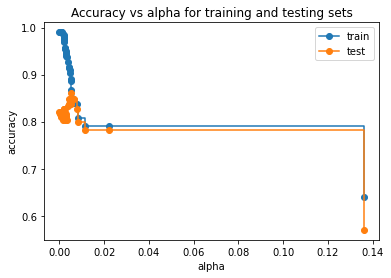

In [173]:
fig , ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score , marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alpha, test_score,marker = 'o', label='test', drawstyle = 'steps-post')
ax.legend()
plt.show()